### Data Collection
Obtaining the required data for the analysis by scraping NCDC website, import data from the JoHn Hopkins repository and importing the provided external data.

### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
#Write Your Code Below
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://covid19.ncdc.gov.ng/'
response = requests.get(url)
print(response.status_code)

200


In [3]:
soup = BeautifulSoup(response.text,"html.parser")

In [4]:
table = soup.find_all("table")

In [5]:
no_rows = []
for row in table[0].find_all("tr"):
    columns = row.find_all("td")
    no_rows.append(columns)

In [6]:
with open("covidnig.csv", "wt") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([(i.text).strip() for i in table[0].find_all("tr")[0].find_all("th")])
    for i in range (1,(len(no_rows))):
        writer.writerow([(d.text).strip() for d in table[0].find_all("tr")[i].find_all("td")])

In [7]:
#Saving the data to a DataFrame
dfnig = pd.read_csv("covidnig.csv")

### B - John Hopkins Data Repository
Obtaining data from John Hopkins repository through the link below and saving it to a dataframe for futher analysis.  
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [8]:
#df1
confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed_global = pd.read_csv(confirmed_global)

In [9]:
#df2
recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered_global = pd.read_csv(recovered_global)

In [10]:
#df3
deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths_global = pd.read_csv(deaths_global)

### C - External Data 
Saving the external data to a DataFrame

In [11]:
df_external = pd.read_csv('covid_external.csv')

In [12]:
df_budget = pd.read_csv('Budget data.csv')

### Viewing the data
Obtaining basic information about the data using the `head()` and `info()` method.

In [13]:
dfnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"58,062",633,"56,990",439
1,FCT,"19,754",505,"19,084",165
2,Plateau,"9,034",0,"8,977",57
3,Kaduna,"8,998",28,"8,905",65
4,Rivers,"7,037",57,"6,879",101


In [14]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [15]:
df_confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951


In [16]:
df_recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51928,51940,51956,51961,51962,51989,52005,52013,52022,52083
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,95035,95600,96129,96672,97206,97723,98269,98903,99441,100013
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,82096,82192,82289,82392,82493,82600,82704,82813,82929,83048
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11570,11616,11692,11732,11770,11825,11890,11932,11989,11989
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21489,21545,21557,21589,21890,22058,22093,22115,22144,22175


In [17]:
df_deaths_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2512,2512,2516,2521,2521,2521,2529,2529,2532,2533
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2283,2291,2297,2304,2310,2317,2321,2326,2331,2335
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3112,3116,3119,3123,3126,3130,3134,3137,3141,3144
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,117,119,120,120,120,120,121,121,121,121
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,547,547,549,549,550,553,554,554,557,557


In [18]:
df_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,1.0,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,1.0,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.9,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.9,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.9,0.1,0.8,0.8,0.84


In [19]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [20]:
df_budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [21]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


### Task 3 - Data Cleaning and Preparation

* Converting to appropriate data type.
* Renaming the columns of the scraped data.
* Removing comma(,) in numerical data and converting it to int datatype.
* Extract daily data for Nigeria from the Global daily cases data.

In [22]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


Cleaning scraped data

In [23]:
dfnig.columns = ['states', 'cases_lab_confirmed', 'cases_on_admission', 'discharged', 'deaths']

In [24]:
dfnig.replace(',','',regex=True, inplace=True)

In [25]:
numeric_col=['cases_lab_confirmed', 'cases_on_admission', 'discharged']
dfnig[numeric_col] = dfnig[numeric_col].apply(pd.to_numeric, errors='coerce')

In [26]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   cases_lab_confirmed  37 non-null     int64 
 2   cases_on_admission   37 non-null     int64 
 3   discharged           37 non-null     int64 
 4   deaths               37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [27]:
def NigeriaCases(df):
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby('Country/Region').sum().loc['Nigeria']
    df = df.to_frame().reset_index()
    df.columns = ['Date', 'Cases']
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [28]:
confirmed_nig = NigeriaCases(df_confirmed_global)

In [29]:
confirmed_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    450 non-null    datetime64[ns]
 1   Cases   450 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.2 KB


In [30]:
confirmed_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [31]:
recovered_nig = NigeriaCases(df_recovered_global)

In [32]:
recovered_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    450 non-null    datetime64[ns]
 1   Cases   450 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.2 KB


In [33]:
recovered_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [34]:
deaths_nig = NigeriaCases(df_deaths_global)

In [35]:
deaths_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    450 non-null    datetime64[ns]
 1   Cases   450 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.2 KB


In [36]:
deaths_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


### Analysis

Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

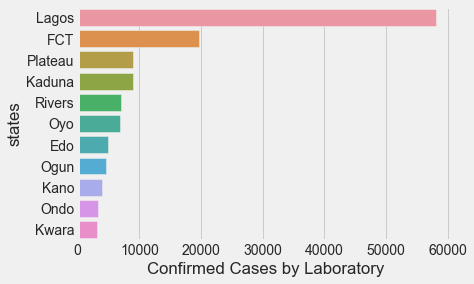

In [37]:
sns.barplot(x='cases_lab_confirmed', y='states', data=dfnig.loc[:10]).set_xlabel(
            "Confirmed Cases by Laboratory")
plt.show()

Top 3 States are Lagos, Abuja and Plateau  (24/03/2021)

Generate a plot that shows the Top 10 states in terms of Discharged Covid cases

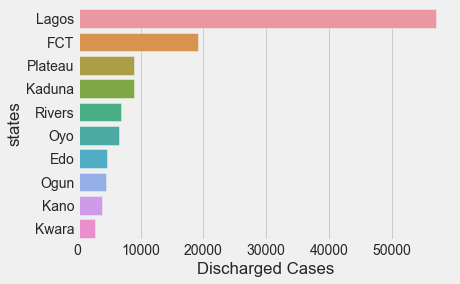

In [38]:
sns.barplot(x='discharged', y='states', data=dfnig.sort_values(['discharged'], ascending=False).loc[:10]).set_xlabel(
            "Discharged Cases")
plt.show()

Plot the top 10 states with active cases

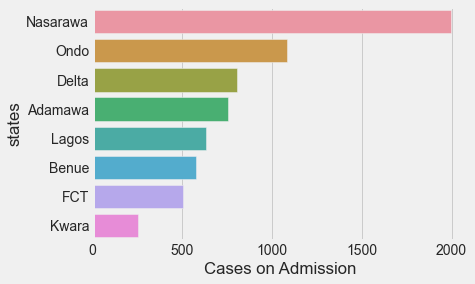

In [39]:
sns.barplot(x='cases_on_admission', y='states', data=dfnig.sort_values(['cases_on_admission'],
                    ascending=False).loc[:10]).set_xlabel("Cases on Admission")
            
plt.show()

FCT has the highest cases on admission despite the highest confirmed cases is in Lagos

Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

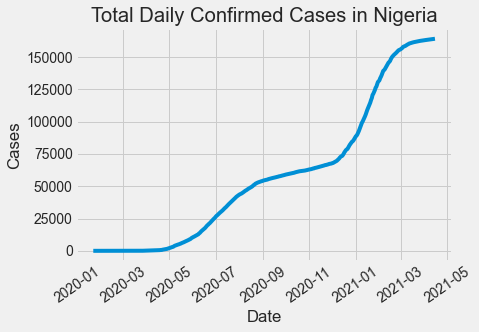

In [40]:
# Total daily confirmed cases in Nigeria
sns.lineplot(x='Date', y='Cases', data=confirmed_nig)
plt.xticks(rotation=35)
plt.title("Total Daily Confirmed Cases in Nigeria")
plt.show()

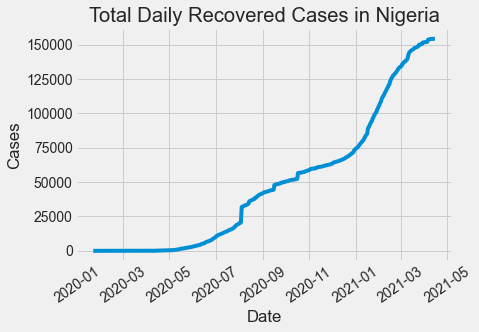

In [41]:
# Total daily recovered cases in Nigeria
sns.lineplot(x='Date', y='Cases', data=recovered_nig)
plt.xticks(rotation=35)
plt.title("Total Daily Recovered Cases in Nigeria")
plt.show()

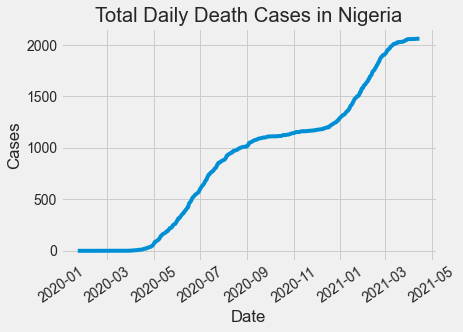

In [42]:
# Total daily death cases in Nigeria
sns.lineplot(x='Date', y='Cases', data=deaths_nig)
plt.xticks(rotation=35)
plt.title("Total Daily Death Cases in Nigeria")
plt.show()

Generating a line plot for the daily infection rate

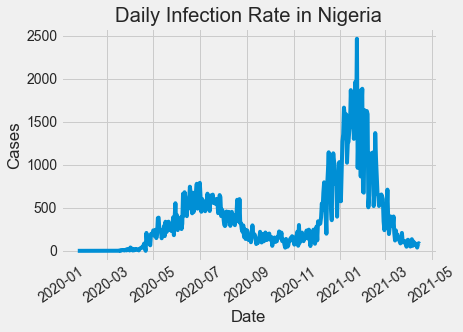

In [43]:
y = confirmed_nig['Cases'].diff()
sns.lineplot(x='Date', y=y, data=confirmed_nig)
plt.xticks(rotation=35)
plt.title("Daily Infection Rate in Nigeria")
plt.show()

The maximum rate is observed to be around January 2021

Maximum number of new cases and the date

In [44]:
y.max()

2464.0

In [45]:
confirmed_nig['IFR'] = confirmed_nig['Cases'].diff()
confirmed_nig.loc[confirmed_nig['IFR'] == y.max()]

,Date,Cases,IFR
367,2021-01-23,120602,2464.0


The maximum infection rate 2464 was recorded on 23rd of January, 2021. Although, there was a mixed up on NCDC official twitter account on the previous day as two different result was published.
  * 2021-01-22: Total confirmed = 118,138
  * 2021-01-22: Total confirmed = 118,969
  * 2021-01-23: Total confirmed = 120,602

The john Hopkins University picked 118,138 for 2021-01-22 to arrive at the confirmed cases.

Relationship between the external dataset and the NCDC COVID-19 dataset.

In [46]:
df_join = pd.merge(dfnig, df_external, how='outer', on=['states'])

In [47]:
df_join.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,58062.0,633.0,56990.0,439.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19754.0,505.0,19084.0,165.0,North Central,4865000.0,0.3,0.0,0.9,0.4,1.0,0.9,0.6,0.2,0.79
2,Plateau,9034.0,0.0,8977.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,1.0,0.3,0.5,0.3,0.93
3,Kaduna,8998.0,28.0,8905.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.6,0.4,0.6,0.4,0.86
4,Rivers,7037.0,57.0,6879.0,101.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.3,0.9,0.1,0.1,1.00


In [48]:
df_tcases = df_join.nlargest(11, 'cases_lab_confirmed')

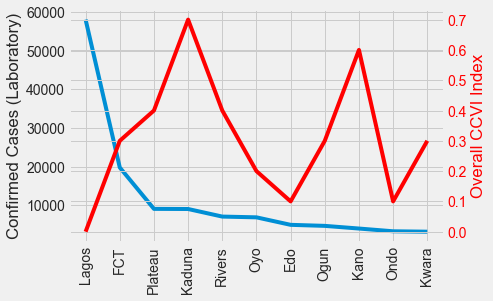

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_tcases['states'], df_tcases['cases_lab_confirmed'])
ax1.set_ylabel('Confirmed Cases (Laboratory)')
ax2 = ax1.twinx()
ax2.plot(df_tcases['states'], df_tcases['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()

Observation

The states with the highest vulnerabilty index in relation to the confirmed cases are the northen states due to the weak health system and poverty.  Lagos has a high number of confirmed cases but has less vulnerability index score because of good health system, more social distancing etc.

##### Determining the relationship between external dataset and NCDC COVID-19 dataset

###### Confirmed cases and population density

<AxesSubplot:xlabel='Population Density', ylabel='cases_lab_confirmed'>

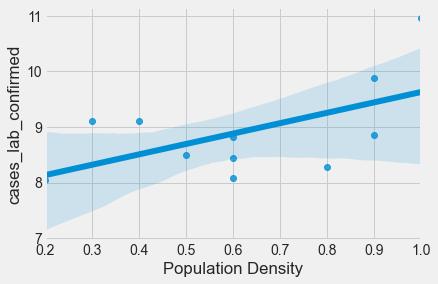

In [50]:
sns.regplot(df_tcases['Population Density'], np.log(df_tcases['cases_lab_confirmed']))

The cases lab confirmed and the population density have positive correlation. This means there are high cases in densely populated area.

###### Confirmed cases and Fragilty

<AxesSubplot:xlabel='Fragility', ylabel='cases_lab_confirmed'>

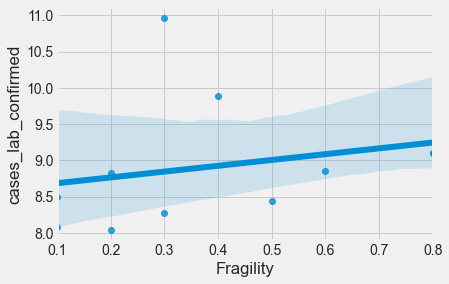

In [51]:
sns.regplot(df_tcases['Fragility'], np.log(df_tcases['cases_lab_confirmed']))

The cases lab confirmed and fragility have positive correlation. This may be due to the effect of civil unrest which may lead to the violation of the lockdown rules

###### Confirmed cases and Socio-Economy

<AxesSubplot:xlabel='Socio-Economic', ylabel='cases_lab_confirmed'>

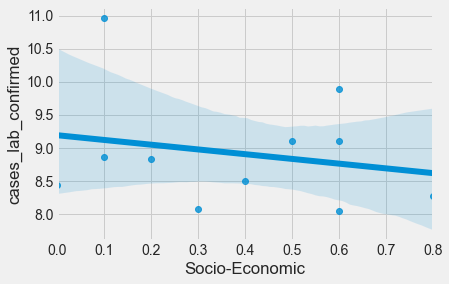

In [52]:
sns.regplot(df_tcases['Socio-Economic'], np.log(df_tcases['cases_lab_confirmed']))

The cases lab confirmed and the socio-economic have negative correlation. Having access to information and being educated helps a lot in staying away from danger of the deadly virus. 

###### Confirmed cases and Age

<AxesSubplot:xlabel='Age', ylabel='cases_lab_confirmed'>

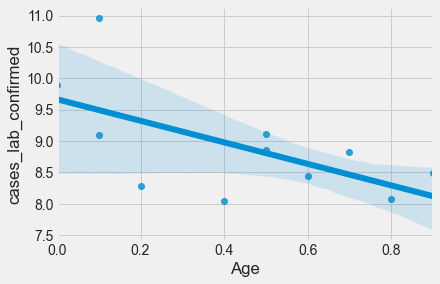

In [53]:
sns.regplot(df_tcases['Age'], np.log(df_tcases['cases_lab_confirmed']))

Despite the high risk of aged people to contact the deadly virus due to their low immune system the cases lab confirmed is negatively correlated wit age. Due to the observation from the medical practitioners that aged people are likely not to survive the virus, they took all measures to revent themselves from contacting the virus which leads to the negative correlation wiht the confirmed cases.

###### Confirmed cases and Acute IHR

<AxesSubplot:xlabel='Acute IHR', ylabel='cases_lab_confirmed'>

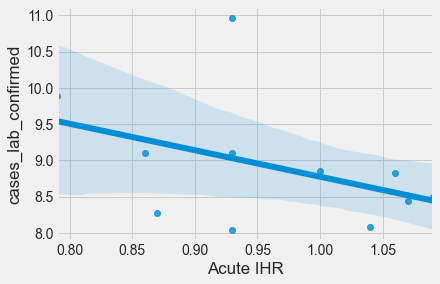

In [54]:
sns.regplot(df_tcases['Acute IHR'], np.log(df_tcases['cases_lab_confirmed']))

###### Confirmed cases and Health System

<AxesSubplot:xlabel='Health System', ylabel='cases_lab_confirmed'>

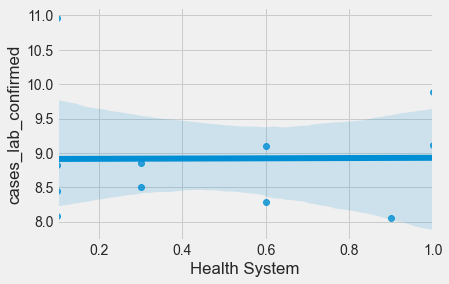

In [55]:
sns.regplot(df_tcases['Health System'], np.log(df_tcases['cases_lab_confirmed']))

The Correlation between the health system and case lab confirmed is low. This shows that the weak health system does not directly affect the confirmed cases. The poor health system can affect the confirmed cases through epidemiological factor where by people in the area can be exposed to epidemy and throught that, COVID can easily affect them.

###### Confirmed cases and Epidemiology

<AxesSubplot:xlabel='Epidemiological', ylabel='cases_lab_confirmed'>

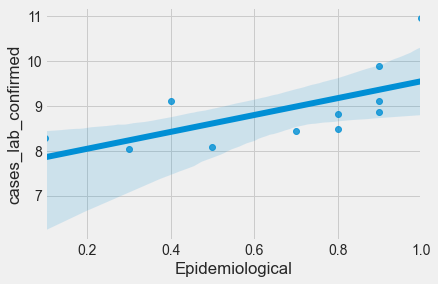

In [56]:
sns.regplot(df_tcases['Epidemiological'], np.log(df_tcases['cases_lab_confirmed']))

The cases lab confirmed and epidemiological factor are positively correlated. Apart from the aged people, having an underline sickeness weekens the immune system which might not be able to resist the corona virus.

In [57]:
df_death_tcases = df_join.nlargest(11, 'deaths')

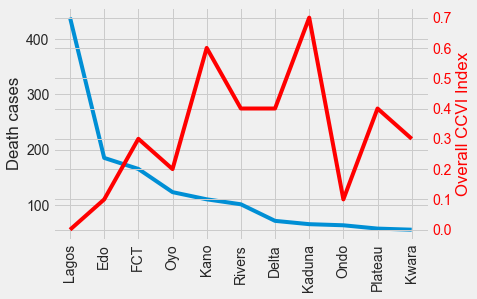

In [58]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_death_tcases['states'], df_death_tcases['deaths'])
ax1.set_ylabel('Death cases')
ax2 = ax1.twinx()
ax2.plot(df_death_tcases['states'], df_death_tcases['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()

The states with the highest vulnerabilty index in relation to death are the northen states due to the weak health system and poverty. Lagos has a highest number of death cases but has less vulnerability index score because of good health system

In [59]:
# Getting the percentage of death (p_death) compared to the confirmed cases
df_death_tcases['p_death'] = df_death_tcases['deaths']/df_death_tcases['cases_lab_confirmed']

In [60]:
df_death_tcases.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,p_death
0,Lagos,58062.0,633.0,56990.0,439.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,0.007561
6,Edo,4897.0,5.0,4707.0,185.0,South South,4705000.0,0.1,0.9,0.8,0.1,0.3,0.5,0.4,0.3,1.09,0.037778
1,FCT,19754.0,505.0,19084.0,165.0,North Central,4865000.0,0.3,0.0,0.9,0.4,1.0,0.9,0.6,0.2,0.79,0.008353
5,Oyo,6839.0,210.0,6506.0,123.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.1,0.6,0.2,0.3,1.06,0.017985
8,Kano,3938.0,23.0,3805.0,110.0,North West,14726000.0,0.6,0.2,0.1,0.3,0.6,0.8,0.8,0.5,0.87,0.027933


###### Percentage Death and Age

<AxesSubplot:xlabel='Age', ylabel='p_death'>

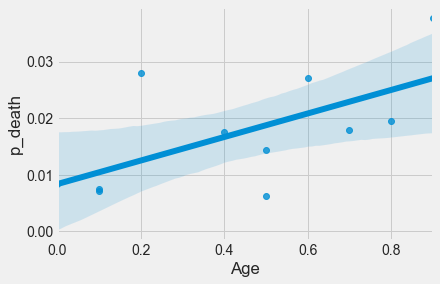

In [61]:
sns.regplot(df_death_tcases['Age'], df_death_tcases['p_death'])

The percentage of death is positively correlated with the age factor. This shows that their is high posibilty taht aged people cannot survive the virus if cintacted.

###### Death and Epidemiological

<AxesSubplot:xlabel='Epidemiological', ylabel='deaths'>

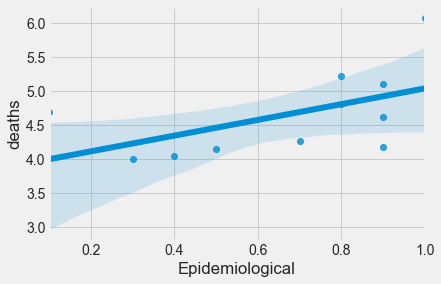

In [62]:
sns.regplot(df_death_tcases['Epidemiological'], np.log(df_death_tcases['deaths']))

Epidemiology affect the immune system of human and the effect of corona to be high where there's high epidemiology. This made the correlation between the two to be positive. 

###### Death and Health Sysytem

<AxesSubplot:xlabel='Health System', ylabel='deaths'>

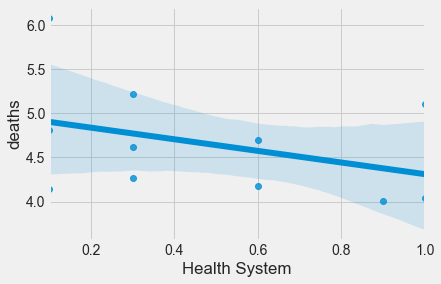

In [64]:
sns.regplot(df_death_tcases['Health System'], np.log(df_death_tcases['deaths']))

The bad health system in some regions has denied them proper test to detect the actual problem going on with then where some people even died of COVID and not recorded.

###### Death and Population Density

<AxesSubplot:xlabel='Population Density', ylabel='deaths'>

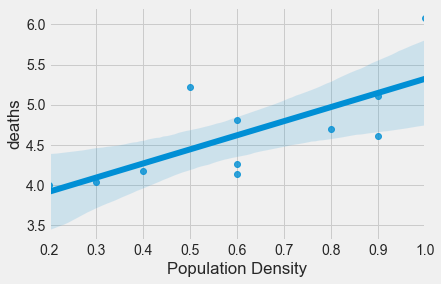

In [65]:
sns.regplot(df_death_tcases['Population Density'], np.log(df_death_tcases['deaths']))

Population density and death are positively correlated as the number of confirmed cases are positively correlated with population density. Lagos has the highest number of confirmed cases and has the highest numbe rof death cases. The second state with the highest number of death cases is edo but it is not the secon on the number of confirmed cases. This is because the epidemioogical factor is high and will bring down the ppossibility of survival i the state. 

In [68]:
df_discharged_tcases = df_join.nlargest(11, 'discharged') 

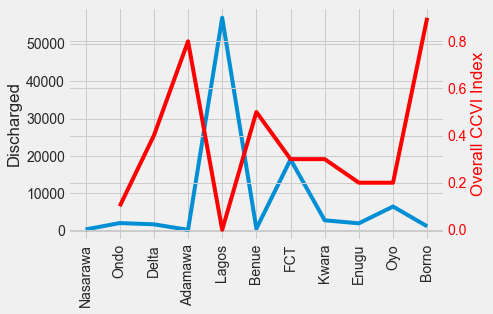

In [82]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_discharged_tcases['states'], df_discharged_tcases['discharged'])
ax1.set_ylabel('Discharged')
ax2 = ax1.twinx()
ax2.plot(df_discharged_tcases['states'], df_discharged_tcases['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()

Lagos Has the highest number of of discharged cases and the lowest overall CCVI index. This confirm the good health system in the area. Alternatively, nothern states have the lowest discharged cases with high overall CCVI index.

In [70]:
# Getting the percentage of discharged cases
df_discharged_tcases['p_discharged'] = df_discharged_tcases['discharged']/ df_discharged_tcases['cases_lab_confirmed']

In [71]:
df_discharged_tcases.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,p_discharged
0,Lagos,58062.0,633.0,56990.0,439.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,0.981537
1,FCT,19754.0,505.0,19084.0,165.0,North Central,4865000.0,0.3,0.0,0.9,0.4,1.0,0.9,0.6,0.2,0.79,0.966083
2,Plateau,9034.0,0.0,8977.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,1.0,0.3,0.5,0.3,0.93,0.993691
3,Kaduna,8998.0,28.0,8905.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.6,0.4,0.6,0.4,0.86,0.989664
4,Rivers,7037.0,57.0,6879.0,101.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.3,0.9,0.1,0.1,1.00,0.977547


<AxesSubplot:xlabel='Age', ylabel='p_discharged'>

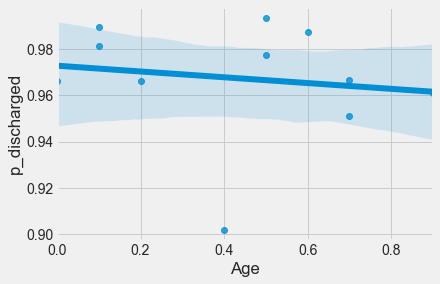

In [72]:
sns.regplot(df_discharged_tcases['Age'], df_discharged_tcases['p_discharged'])

<AxesSubplot:xlabel='Age', ylabel='discharged'>

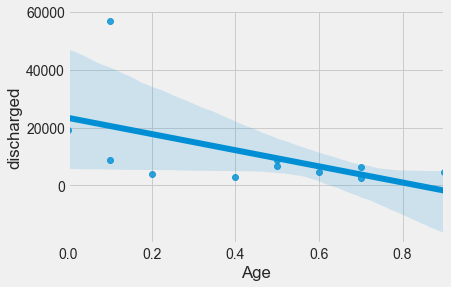

In [73]:
sns.regplot(df_discharged_tcases['Age'], df_discharged_tcases['discharged'])

Using the percentage discharged and the discharged values, the negative correlations shows that aged people rearly survive the deadly virus if contracted which confirmed the researches from the medical practitioners

<AxesSubplot:xlabel='Epidemiological', ylabel='p_discharged'>

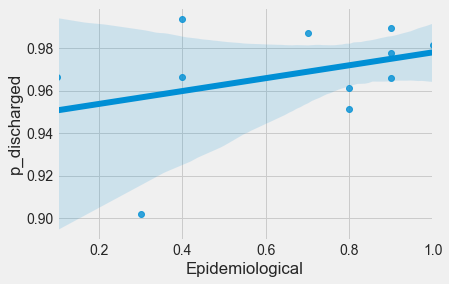

In [74]:
sns.regplot(df_discharged_tcases['Epidemiological'], df_discharged_tcases['p_discharged'])

<AxesSubplot:xlabel='Health System', ylabel='discharged'>

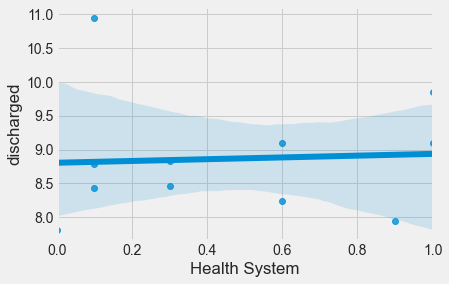

In [75]:
sns.regplot(df_discharged_tcases['Health System'], np.log(df_discharged_tcases['discharged']))

<AxesSubplot:xlabel='Fragility', ylabel='discharged'>

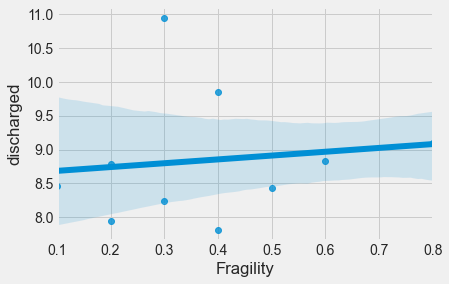

In [76]:
sns.regplot(df_discharged_tcases['Fragility'], np.log(df_discharged_tcases['discharged']))

<AxesSubplot:xlabel='Population Density', ylabel='discharged'>

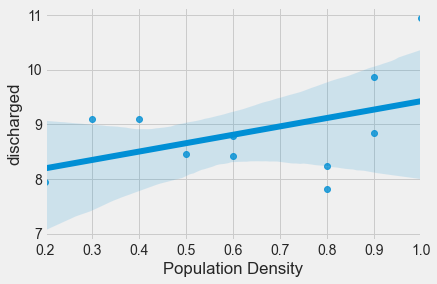

In [77]:
sns.regplot(df_discharged_tcases['Population Density'], np.log(df_discharged_tcases['discharged']))

<AxesSubplot:xlabel='Socio-Economic', ylabel='discharged'>

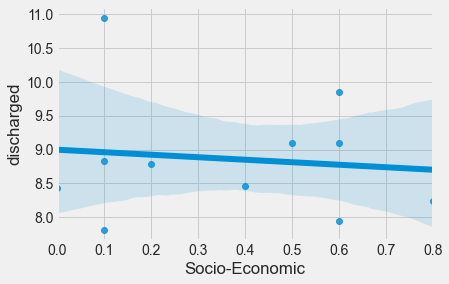

In [78]:
sns.regplot(df_discharged_tcases['Socio-Economic'], np.log(df_discharged_tcases['discharged']))

<AxesSubplot:xlabel='Acute IHR', ylabel='discharged'>

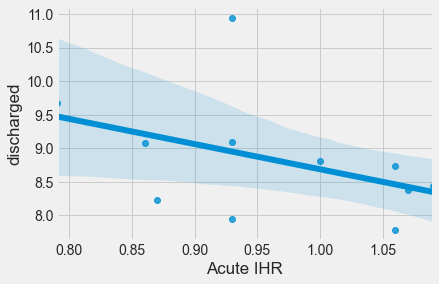

In [139]:
sns.regplot(df_discharged_tcases['Acute IHR'], np.log(df_discharged_tcases['discharged']))

In [80]:
df_admission_tcases = df_join.nlargest(11, 'cases_on_admission') 

In [81]:
df_admission_tcases

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
13,Nasarawa,2380.0,1994.0,373.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ondo,3226.0,1083.0,2080.0,63.0,South West,5185000.0,0.1,0.8,0.5,0.1,0.1,0.6,0.3,0.3,1.04
11,Delta,2617.0,802.0,1744.0,71.0,South South,6303000.0,0.4,0.6,0.7,0.2,0.3,0.6,0.5,0.4,1.08
25,Adamawa,1063.0,757.0,274.0,32.0,North East,4672000.0,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94
0,Lagos,58062.0,633.0,56990.0,439.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
24,Benue,1188.0,575.0,591.0,22.0,North Central,6376000.0,0.5,0.7,0.5,0.7,0.9,0.4,0.3,0.5,0.91
1,FCT,19754.0,505.0,19084.0,165.0,North Central,4865000.0,0.3,0.0,0.9,0.4,1.0,0.9,0.6,0.2,0.79
10,Kwara,3120.0,251.0,2814.0,55.0,North Central,3524000.0,0.3,0.4,0.3,0.2,0.9,0.2,0.6,0.7,0.93
14,Enugu,2281.0,239.0,2013.0,29.0,South East,4801000.0,0.2,0.9,0.4,0.0,0.4,0.7,0.4,0.1,1.14
5,Oyo,6839.0,210.0,6506.0,123.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.1,0.6,0.2,0.3,1.06


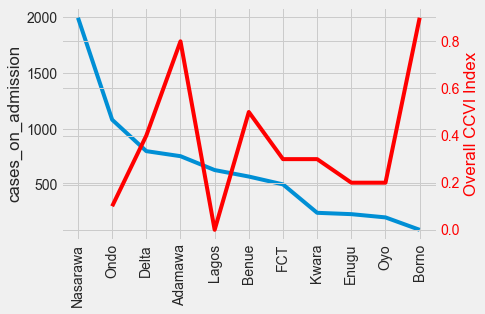

In [83]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_admission_tcases['states'], df_admission_tcases['cases_on_admission'])
ax1.set_ylabel('cases_on_admission')
ax2 = ax1.twinx()
ax2.plot(df_admission_tcases['states'], df_admission_tcases['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()

In [85]:
df_admission_tcases['p_admission'] = df_admission_tcases['cases_on_admission']/ df_admission_tcases['cases_lab_confirmed']

<AxesSubplot:xlabel='Age', ylabel='p_admission'>

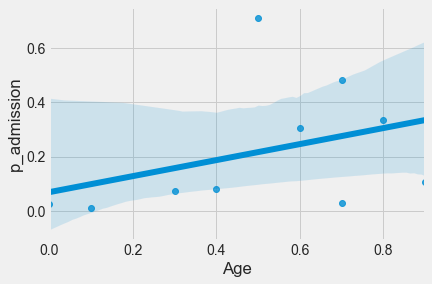

In [87]:
sns.regplot(df_admission_tcases['Age'], (df_admission_tcases['p_admission']))

Age will be postitvely correlted with the cases on admission because aged people have low immunity to fight the virus.

<AxesSubplot:xlabel='Epidemiological', ylabel='cases_on_admission'>

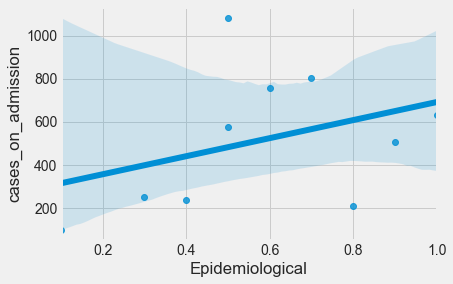

In [89]:
sns.regplot(df_admission_tcases['Epidemiological'], (df_admission_tcases['cases_on_admission']))

Epidemiolgical factor affect the cases on admission because people with undelined disease will realy recover from the virus which make many of then stay at the isolation center for a long time and eventually died.

<AxesSubplot:xlabel='Fragility', ylabel='cases_on_admission'>

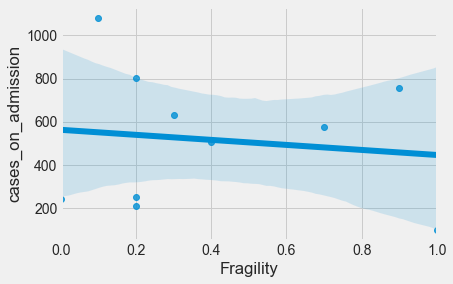

In [90]:
sns.regplot(df_admission_tcases['Fragility'], (df_admission_tcases['cases_on_admission']))

<AxesSubplot:xlabel='Health System', ylabel='cases_on_admission'>

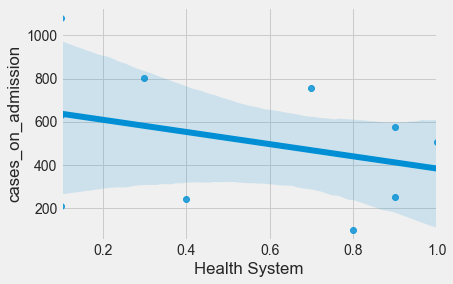

In [91]:
sns.regplot(df_admission_tcases['Health System'], (df_admission_tcases['cases_on_admission']))

Cases on admission has negative correlation with health system. In region where the health system poor, people are being rejected from the isolation center due to inadequate space for them to be treated

<AxesSubplot:xlabel='Acute IHR', ylabel='cases_on_admission'>

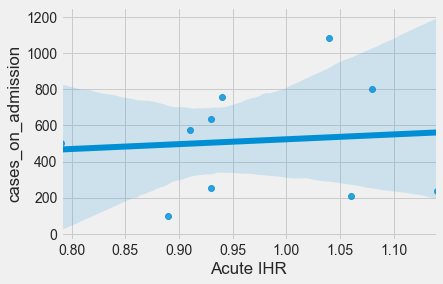

In [92]:
sns.regplot(df_admission_tcases['Acute IHR'], (df_admission_tcases['cases_on_admission']))

Not giving the required acute care will lead to increase in cases on adminssion. This has led to the positive corelation between Acute IHR and the cases on admission.